In [1]:
## this is the code required portions of the PSET // later to be transferred to
## to the LaTeX homework sheet

In [13]:
## IMPORTS
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log, factorial
from scipy.optimize import minimize

In [5]:
def neg_log_likelihood(lambda_estimate, obs):
    ## direct implementation of the equation found in q1 
    n = len(obs)
    sum_x_i = sum(obs)
    log_fact_sum = sum(log(factorial(x)) for x in obs)
    neg_log_likelihood = n * lambda_estimate - \
        sum_x_i * log(lambda_estimate) + log_fact_sum
    return neg_log_likelihood

n_estimate = neg_log_likelihood(
    20, [22, 23, 23, 12, 18, 25, 23, 14])
print(n_estimate)

23.551530395903967


In [25]:
from scipy.optimize import minimize

def optimize_lambda(obs):
    """
    Find the lambda that minimizes the negative log likelihood for a given set of observations.
    
    Parameters:
    - observations: List of observed counts
    
    Returns:
    - Optimal lambda (MLE) as a scalar
    """

    def objective(lambda_): return neg_log_likelihood(
        lambda_, obs)

    result = minimize(objective, n_estimate, bounds=[(1e-5, None)])

    return result.x[0]

max_estimate = optimize_lambda([22, 23, 23, 12, 18, 25, 23, 14])
max_estimate

/var/folders/c1/5zzf4b396wdgc4t2xxg1dqw00000gn/T/ipykernel_12304/2631031015.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  neg_log_likelihood = n * lambda_ - sum_x_i * log(lambda_) + log_fact_sum


20.000011410833455

/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


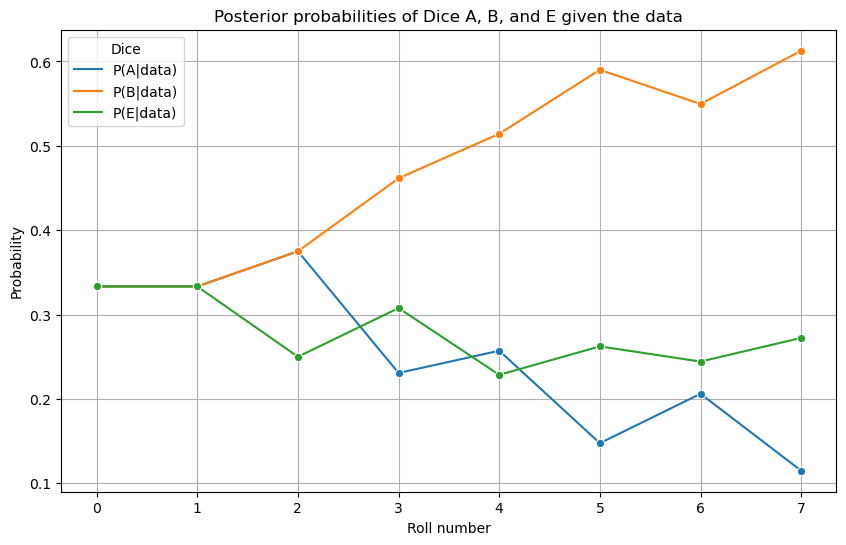

In [27]:
freq_A = [6, 4, 3, 3, 2, 2, 1, 1, 1, 1] 
freq_B = [3, 3, 3, 2, 2, 2, 2, 2, 2, 1]
freq_E = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

cond_A = [f / 20 for f in freq_A]
cond_B = [f / 20 for f in freq_B]
cond_E = [f / 20 for f in freq_E]


data = [5, 3, 9, 3, 8, 4, 7]

## initial posterior probabilites
p_A, p_B, p_E = [1/3], [1/3], [1/3]

for num in data:
    pA = cond_A[num - 1] * p_A[-1]
    pB = cond_B[num - 1] * p_B[-1]
    pE = cond_E[num - 1] * p_E[-1]

    total = pA + pB + pE

    p_A.append(pA / total)
    p_B.append(pB / total)
    p_E.append(pE / total)

df = pd.DataFrame({'roll': range(0, len(data) + 1),
                  'P(A|data)': p_A, 'P(B|data)': p_B, 'P(E|data)': p_E})

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='roll', y='value', hue='variable',
             data=pd.melt(df, ['roll']), marker='o')
plt.title('Posterior probabilities of Dice A, B, and E given the data')
plt.xlabel('Roll number')
plt.ylabel('Probability')
plt.xticks(range(len(data) + 1))
plt.legend(title='Dice')
plt.grid(True)
plt.show()

In [28]:
print(f"Probability of Die A being selected: {p_A[-1]:.4f}")
print(f"Probability of Die B being selected: {p_B[-1]:.4f}")
print(f"Probability of Die E being selected: {p_E[-1]:.4f}")

Probability of Die A being selected: 0.1149
Probability of Die B being selected: 0.6128
Probability of Die E being selected: 0.2723
